# **Retail Sales EDA in Python**

This **[Retail Sales Dataset](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data)** is a snapshot of a fictional retail landscape, capturing essential attributes that drive retail operations and customer interactions. It includes key details such as `Transaction ID`, `Date`, `Customer ID`, `Gender`, `Age`, `Product Category`, `Quantity`, `Price per Unit`, and `Total Amount`.

I will limit myself to these three questions:

* Analysis 1: Customer `Age`, `Gender`, and Purchasing Behaviour
* Analysis 2: Top `Product Category` for each `Age` and `Gender`
* Analysis 3: Total Daily and Monthly Spending grouped by `Date`, Number of Customers (`Customer ID`), `Gender`and`Product Category`

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
retail = pd.read_csv(r'C:\Users\Gourav vijay Gaikwad\Downloads\Oasis Datasets/retail_sales_dataset.csv')

df = retail.copy() # make a copy of the original dataset
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


# Data Cleaning

Since this particular dataset has **No Missing values**, I will confirm if there are unexpected values by checking for *unique values* in each column and identifying potential *outliers*

In [3]:
df.info()  # 1000 rows and 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
# Date column is an object. Convert to datetime dtype to enable Date specific analyses
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [6]:
# Check for missing values
df.isnull().sum()  # There are No missing values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
# Check for unique values in all columns
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

From the output above:

* There are 1000 distinct Transaction IDs and 1000 distinct Customers (Customer ID)s
* Since there are only 345 unique dates, some customers likely made purchases on the same dates
* The Product categories are only *Beauty*, *Clothing* and *Electronics*

In [8]:
df.describe() # descriptive statistics

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


# Analysis 1: Customer Age, Gender, and Purchasing Behaviour

# Total spending for each combination of Age and Gender

In [9]:
# Group by Age and Gender, calculate Total Spending
age_gender_grouped = df.groupby(["Age", "Gender"])["Total Amount"].sum().unstack()

print(age_gender_grouped.to_string())

Gender  Female  Male
Age                 
18        7940  3275
19        7335  7535
20        5175  3470
21        5400  7185
22        5425  8275
23        2895  5325
24        1750  3665
25        3550  6350
26       10375  3605
27        4280  5105
28        5400  3270
29        4000  2570
30        6285  3505
31        2020  8200
32        1850  3700
33        2040  4200
34       12050  4735
35        6815  4475
36        3080  6025
37        5730  5920
38        6020  5080
39        3355  1240
40        7630  1785
41        1195  4455
42        5290  3210
43       10260  7710
44        3590  3970
45         585  5740
46        5380  7710
47        6315  6190
48        5410  1830
49        2650  2460
50        4300  5545
51        7270  8795
52        4270  2770
53        4890  4620
54        5755  4750
55        7070  2710
56        6025  3415
57        3630  5660
58        3680  3715
59        3785  5685
60        7660  3930
61        2840  3890
62        3060  5060
63        120

# Insights from Analysis 1

Analysis 1 shows how **Total spending** varies with `Age` and `Gender`

For example: For 18 year olds, Females collectively spent **more** than Males. The opposite is shown for 22 year olds, and so on. 

See the Barplot below

# Barplot of Total Spending by Age and Gender

<Figure size 2000x800 with 0 Axes>

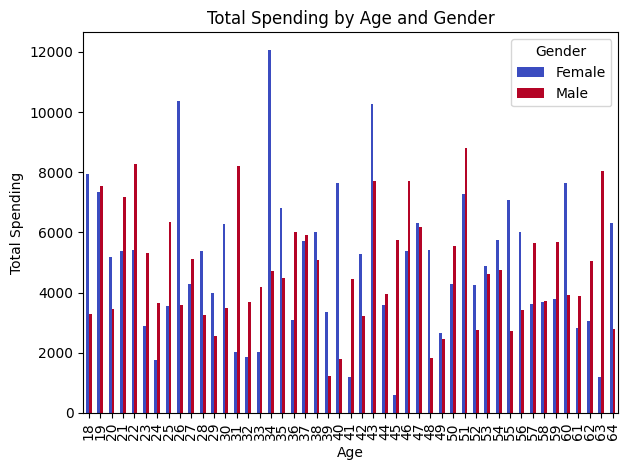

In [10]:
# Barplot
plt.figure(figsize=(20, 8))
age_gender_grouped.plot(kind="bar", stacked=False, colormap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.title("Total Spending by Age and Gender")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Analysis 2: Top Product Categories for each Age and Gender

In [11]:
# Group by Age and Gender, Product categories
age_gender_category_grouped = df.groupby(["Age", "Gender", "Product Category"])["Total Amount"].sum().unstack(level=1)

print(age_gender_category_grouped.to_string())

Gender                Female    Male
Age Product Category                
18  Beauty            3195.0  1765.0
    Clothing          2575.0  1510.0
    Electronics       2170.0     NaN
19  Beauty            2225.0  2140.0
    Clothing          1200.0  1530.0
    Electronics       3910.0  3865.0
20  Beauty             365.0  2160.0
    Clothing            80.0   360.0
    Electronics       4730.0   950.0
21  Beauty            3300.0  4700.0
    Clothing          1200.0  1885.0
    Electronics        900.0   600.0
22  Beauty            1300.0  4230.0
    Clothing          3275.0  2075.0
    Electronics        850.0  1970.0
23  Beauty             475.0   165.0
    Clothing          1270.0  3050.0
    Electronics       1150.0  2110.0
24  Beauty            1575.0  1310.0
    Clothing            25.0  2125.0
    Electronics        150.0   230.0
25  Beauty            1000.0  1375.0
    Clothing          2200.0  2150.0
    Electronics        350.0  2825.0
26  Beauty            1715.0     NaN
 

# Insights from Analysis 2

Analysis 2 helps to identify **Trends in Customer Spending behaviour** based on `Age`, `Gender`, and `Product Category`

The insights:

* Age Preferences: Spending habits change with Age for certain Product Categories
* Gender Differences: There are significant differences in spending patterns between Genders for specific Product Categories

For a larger Real-life dataset, using such analysis can help to refine the **Target Audience for Marketing Campaigns**. Specific Age groups and Genders have a higher propensity to spend on certain Product Categories

# Analysis 3: Total Daily and Monthly Spending

The Total Daily and Monthly Spending are grouped by the ***Most bought Product Category***, ***Number of Customers*** and ***Gender***

# Total Daily Spending

 The output consists of **345 different Dates**

In [19]:
#Group by day
daily_transactions = df.groupby('Date')

# Analyze data for each day
for day, group in daily_transactions:
   # Most bought Product Category 
   most_bought_product_category = group['Product Category'].mode().iloc[0]

 #   Number of Customers (unique customer IDs)
   num_customers = group['Customer ID'].nunique()
    
  #  Gender of Customers
   gender_counts = group['Gender'].value_counts()

 #   Print results for the day
   print(f"Date: {day}")
   print(f"  Most bought Product Category: {most_bought_product_category}")
   print(f"  Number of Customers: {num_customers}")
  
#    Access and print Gender counts
   if 'Male' in gender_counts:
     print(f"    Male Customers: {gender_counts['Male']}")
   if 'Female' in gender_counts:
     print(f"    Female Customers: {gender_counts['Female']}")
    
 #   Total spending per Day
   total_spending = group['Total Amount'].sum()
    
   print(f"  Total spending: {total_spending:.2f}")
   print()  # Add a blank line between days

Date: 2023-01-01 00:00:00
  Most bought Product Category: Clothing
  Number of Customers: 3
    Male Customers: 2
    Female Customers: 1
  Total spending: 3600.00

Date: 2023-01-02 00:00:00
  Most bought Product Category: Clothing
  Number of Customers: 4
    Male Customers: 1
    Female Customers: 3
  Total spending: 1765.00

Date: 2023-01-03 00:00:00
  Most bought Product Category: Beauty
  Number of Customers: 1
    Female Customers: 1
  Total spending: 600.00

Date: 2023-01-04 00:00:00
  Most bought Product Category: Beauty
  Number of Customers: 3
    Male Customers: 2
    Female Customers: 1
  Total spending: 1240.00

Date: 2023-01-05 00:00:00
  Most bought Product Category: Electronics
  Number of Customers: 3
    Male Customers: 1
    Female Customers: 2
  Total spending: 1100.00

Date: 2023-01-06 00:00:00
  Most bought Product Category: Clothing
  Number of Customers: 2
    Male Customers: 1
    Female Customers: 1
  Total spending: 620.00

Date: 2023-01-07 00:00:00
  Most bo

# Total Monthly Spending

In [13]:
# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)

# Analyze data using vectorized operations
def analyze_month(group):
  """Analyzes data for a single month group."""
  # Most bought category
  most_bought_category = group['Product Category'].mode().iloc[0]
  # Number of customers (unique IDs)
  num_customers = group['Customer ID'].nunique()
  # Gender counts
  gender_counts = group['Gender'].value_counts()
  # Total spending
  total_spending = group['Total Amount'].sum()

  # Print results
  print(f"Month: {group.name}")
  print(f"  Most bought Product Category: {most_bought_category}")
  print(f"  Number of Customers: {num_customers}")
  if 'Male' in gender_counts:
    print(f"    Male Customers: {gender_counts['Male']}")
  if 'Female' in gender_counts:
    print(f"    Female Customers: {gender_counts['Female']}")
  print(f"  Total spending on all Product Categories: {total_spending:.2f}")
  print()  # Add a blank line between months

# Apply analysis function to each month group
monthly_transactions.apply(analyze_month)

Month: 1
  Most bought Product Category: Beauty
  Number of Customers: 78
    Male Customers: 38
    Female Customers: 40
  Total spending on all Product Categories: 36980.00

Month: 2
  Most bought Product Category: Clothing
  Number of Customers: 85
    Male Customers: 49
    Female Customers: 36
  Total spending on all Product Categories: 44060.00

Month: 3
  Most bought Product Category: Clothing
  Number of Customers: 73
    Male Customers: 32
    Female Customers: 41
  Total spending on all Product Categories: 28990.00

Month: 4
  Most bought Product Category: Clothing
  Number of Customers: 86
    Male Customers: 36
    Female Customers: 50
  Total spending on all Product Categories: 33870.00

Month: 5
  Most bought Product Category: Electronics
  Number of Customers: 105
    Male Customers: 60
    Female Customers: 45
  Total spending on all Product Categories: 53150.00

Month: 6
  Most bought Product Category: Clothing
  Number of Customers: 77
    Male Customers: 38
    Femal

""


# Insights from Analysis 3 

Analysis 3 examines **Customer Spending Trends throughout the Year**, segmented by **Month**. I look at:

* Most Popular Product Category: The Product Category with the highest total spending in each month.
* Number of Customers: The total number of unique customers who made purchases each month.
* Gender Distribution: The breakdown of customers by Gender (Male and Female) for each month.
* Total Spending: The total amount of money spent by all Customers across **all Product Categories** each month.

The Findings:

1. Spending Fluctuations: There are variations in total spending throughout the year, with some months seeing higher spending than others (e.g., May had the highest spending at 53,150).
2. Category Preferences: The most popular Product Category shifts across months. For instance, *Beauty* was popular in January and July, while *Electronics* dominated in several months (May, and August-December).
3. Customer Trends: The number of customers also fluctuates, with May showing the highest number (105) and September showing the lowest (65). 
4. Gender difference: There are slighlty more Female customers each month than Male

**Actionable Insights**

Once again, in a Real-life dataset the findings can help with:

* Promotions and Marketing: Understanding popular categories by month can help tailor promotions and marketing campaigns to target the right products at the right time.
* Inventory Management: Analyzing monthly sales trends can inform inventory management strategies, ensuring you have adequate stock of popular categories during peak demand months.
* Customer Acquisition: Months with lower customer traffic might be good times to implement customer acquisition campaigns to attract new buyers.

# Total Monthly Spending Trend by Gender

Month: 1
  Male Spending: 12255.00
  Female Spending: 24725.00

Month: 2
  Male Spending: 29665.00
  Female Spending: 14395.00

Month: 3
  Male Spending: 15670.00
  Female Spending: 13320.00

Month: 4
  Male Spending: 16570.00
  Female Spending: 17300.00

Month: 5
  Male Spending: 29220.00
  Female Spending: 23930.00

Month: 6
  Male Spending: 19840.00
  Female Spending: 16875.00

Month: 7
  Male Spending: 18580.00
  Female Spending: 16885.00

Month: 8
  Male Spending: 14880.00
  Female Spending: 22080.00

Month: 9
  Male Spending: 7085.00
  Female Spending: 16535.00

Month: 10
  Male Spending: 19980.00
  Female Spending: 26600.00

Month: 11
  Male Spending: 20030.00
  Female Spending: 14890.00

Month: 12
  Male Spending: 19385.00
  Female Spending: 25305.00



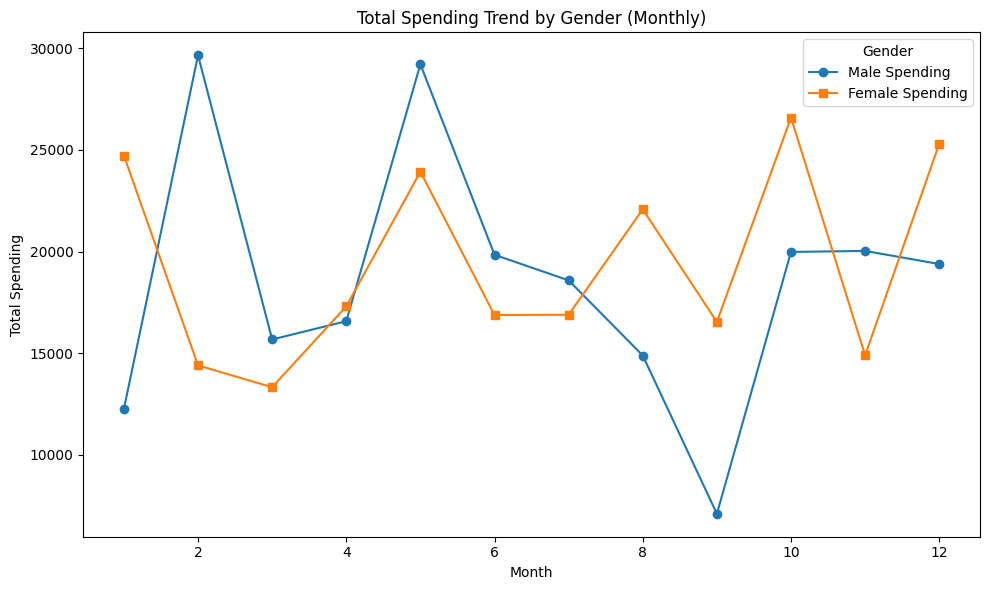

In [14]:
# Group by month (extract month from 'Date' column)
monthly_transactions = df.groupby(df['Date'].dt.month)


def calculate_gender_spending(group):
  """Calculates total spending for male and female customers within a group."""
  male_spending = group[group['Gender'] == 'Male']['Total Amount'].sum()
  female_spending = group[group['Gender'] == 'Female']['Total Amount'].sum()
  return pd.Series({'Male': male_spending, 'Female': female_spending})


# Apply the function to each group and store the result
gendered_spending = monthly_transactions.apply(calculate_gender_spending)

# Print results 
for month, gender_data in gendered_spending.iterrows():
  print(f"Month: {month}")
  print(f"  Male Spending: {gender_data['Male']:.2f}")
  print(f"  Female Spending: {gender_data['Female']:.2f}")
  print()  # Add a blank line between months

# Extract month labels and sales data
months = gendered_spending.index.to_list()
male_spending = gendered_spending['Male'].to_list()
female_spending = gendered_spending['Female'].to_list()

# Create the Lineplot
plt.figure(figsize=(10, 6))  
plt.plot(months, male_spending, marker='o', label='Male Spending')
plt.plot(months, female_spending, marker='s', label='Female Spending')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.legend(title = 'Gender')
plt.title('Total Spending Trend by Gender (Monthly)')
plt.tight_layout()
plt.show()

Using the table and lineplot, we can visually compare **Spending patterns between Genders throughout the year.**

Spending fluctuates for each Gender throughout the year

For instance, in **May**, *Male* spending is the highest at 29220.00, while *Female* spending is the highest in **October** at 26600.00.

***Explore and be teachable***